# E-commerce Case Study

Objective: Increase sales
Assumptions: Revenue structure built on commissions from sales

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
orders_items = pd.read_csv('olist_order_items_dataset.csv') 
orders = pd.read_csv('olist_orders_dataset.csv') 
products = pd.read_csv('olist_products_dataset.csv') 
sellers = pd.read_csv('olist_sellers_dataset.csv') 
customers = pd.read_csv('olist_customers_dataset.csv') 

In [3]:
## Join on relevant unique IDs

join1 = orders.join(orders_items.set_index('order_id'), on='order_id')
join2 = join1.join(products.set_index('product_id'), on='product_id')
join3 = join2.join(customers.set_index('customer_id'), on='customer_id')
df = join3.join(sellers.set_index('seller_id'), on='seller_id')

In [4]:
df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570.0,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840.0,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,30.0,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,31842.0,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,51.0,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,8752.0,mogi das cruzes,SP


In [5]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
product_category_name            2378
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                  793
product_length_cm                 793
product_height_cm                 793
product_width_cm                  793
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
seller_zip_c

In [6]:
## Format time features, create features based on purchase date

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['purchase_year'] = df['order_purchase_timestamp'].dt.year
df['purchase_month'] = df['order_purchase_timestamp'].dt.month
df['purchase_yrmonth'] = df['purchase_year']*100 + df['purchase_month']

In [7]:
## Fill null location values with mode, fill null numerical values with median

sellers_mode = df.seller_state.mode()[0]
median_price = df.price.median()
median_weight = df.freight_value.median()
df.seller_state.fillna(sellers_mode, inplace=True)
df.price.fillna(median_price, inplace=True)
df.freight_value.fillna(median_weight, inplace=True)
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                               0
freight_value                       0
product_category_name            2378
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                  793
product_length_cm                 793
product_height_cm                 793
product_width_cm                  793
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
seller_zip_c

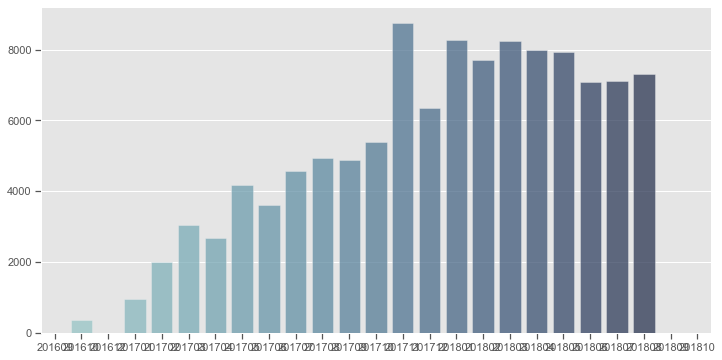

In [8]:
## Lets look at orders over time

monthly_cnt = df['purchase_yrmonth'].value_counts()
plt.figure(figsize=(12,6));
sns.barplot(x=monthly_cnt.index, y=monthly_cnt.values, alpha=0.75, palette="ch:rot=-.25,hue=1,light=.75");

In [9]:
## For the purposes of this case study, lets focus on the months that we have robust data for

df = df[df.purchase_year != 2016]
df = df[df.purchase_yrmonth < 201809]

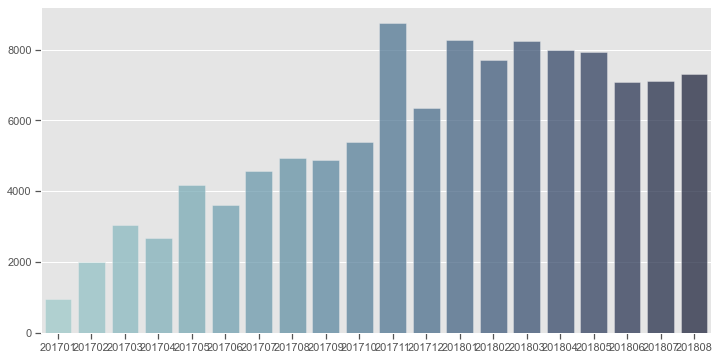

In [10]:
## It's clear that orders are decelerating 

monthly_cnt = df['purchase_yrmonth'].value_counts()
plt.figure(figsize=(12,6));
sns.barplot(x=monthly_cnt.index, y=monthly_cnt.values, alpha=0.75, palette="ch:rot=-.25,hue=1,light=.75");

## Analyzing sales deceleration in 2018

<Figure size 864x432 with 0 Axes>

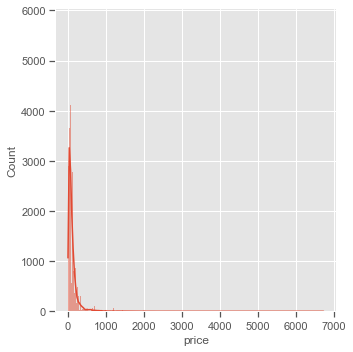

In [11]:
## Let's look at price

plt.figure(figsize=(12,6));
sns.displot(df, x=df.price, kde=True);

<Figure size 864x432 with 0 Axes>

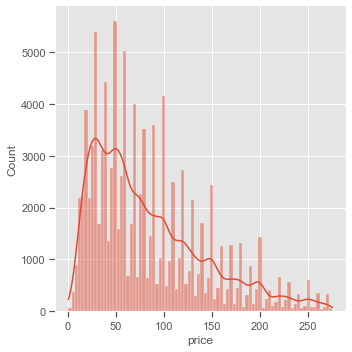

In [12]:
## Remove outliers to get a cleaner distribution

iqr = 1.5 * (np.percentile(df['price'], 75) - np.percentile(df['price'], 25))
df.drop(df[df['price'] > (iqr + np.percentile(df['price'], 75))].index, inplace=True)
df.drop(df[df['price'] < (np.percentile(df['price'], 25) - iqr)].index, inplace=True)

plt.figure(figsize=(12,6));
sns.displot(df, x=df.price, kde=True);

<Figure size 864x432 with 0 Axes>

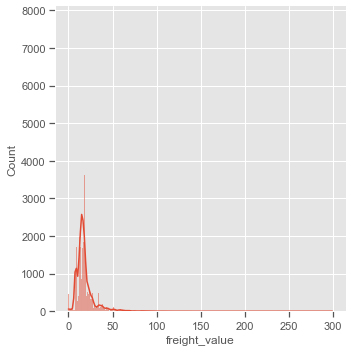

In [13]:
## Let's do the same for freight value

plt.figure(figsize=(12,6));
sns.displot(df, x=df.freight_value, kde=True);

<Figure size 864x432 with 0 Axes>

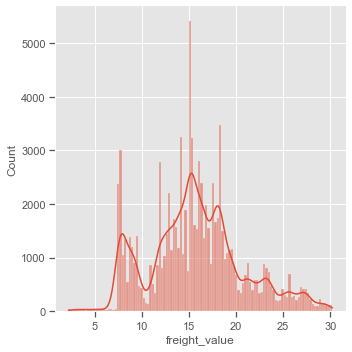

In [14]:
iqr = 1.5 * (np.percentile(df['freight_value'], 75) - np.percentile(df['freight_value'], 25))
df.drop(df[df['freight_value'] > (iqr + np.percentile(df['freight_value'], 75))].index, inplace=True)
df.drop(df[df['freight_value'] < (np.percentile(df['freight_value'], 25) - iqr)].index, inplace=True)

plt.figure(figsize=(12,6));
sns.displot(df, x=df.freight_value, kde=True);

purchase_year
2017    59.99
2018    64.80
Name: price, dtype: float64

<Figure size 1008x504 with 0 Axes>

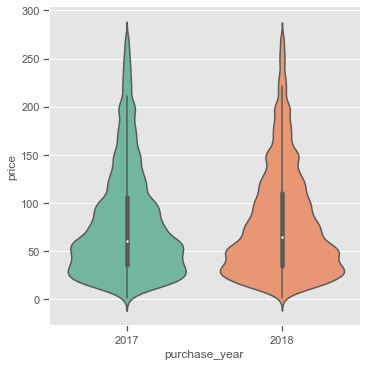

In [15]:
plt.figure(figsize=(14,7));
sns.catplot(x='purchase_year', y='price', palette='Set2', kind='violin', data=df);


med_price = df.groupby(['purchase_year']).price.median()
med_price

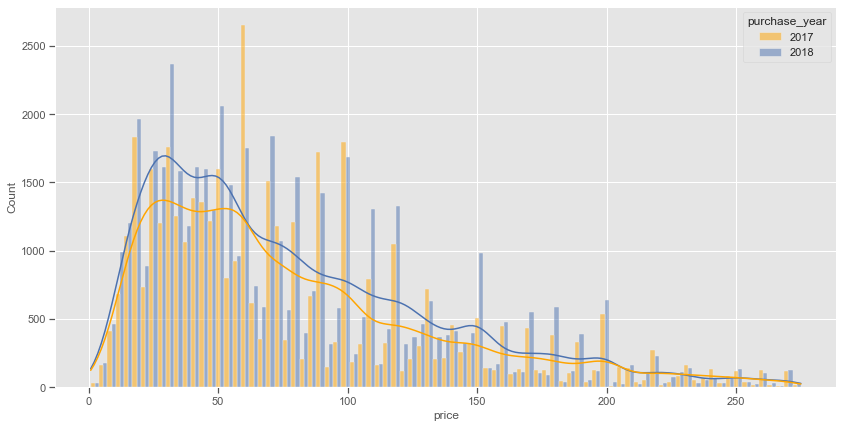

In [16]:
plt.figure(figsize=(14,7));
sns.histplot(df, x=df.price, hue='purchase_year', multiple='dodge', kde=True, palette=["orange", "b"]);

Correlation:  0.29986494677141656


<Figure size 864x432 with 0 Axes>

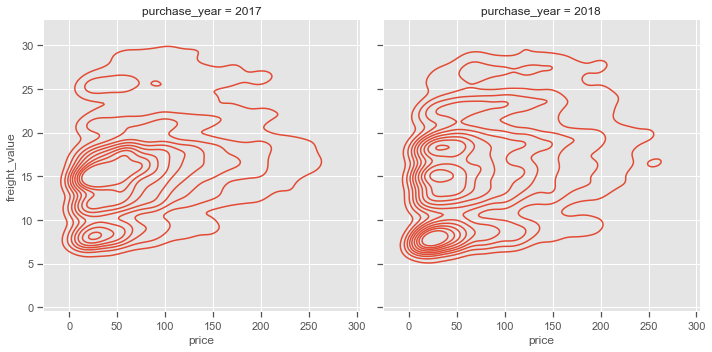

In [17]:
plt.figure(figsize=(12,6));
sns.displot(df, x='price', y='freight_value', col='purchase_year', kind='kde');
print('Correlation: ', df.price.corr(df.freight_value))

The slowdown in sales doesn't appear to be related to a change in pricing, nor is there a strong relationship between price and freight_value. 

   customer_state       price  Percentage
25             SP  1403127.54        41.2
18             RJ   491293.03        14.4
10             MG   418180.31        12.3
22             RS   206141.19         6.1
17             PR   173231.72         5.1
23             SC   130732.42         3.8
4              BA   114783.17         3.4
7              ES    76741.33         2.3
6              DF    73724.70         2.2
8              GO    72855.39         2.1


<Figure size 1008x504 with 0 Axes>

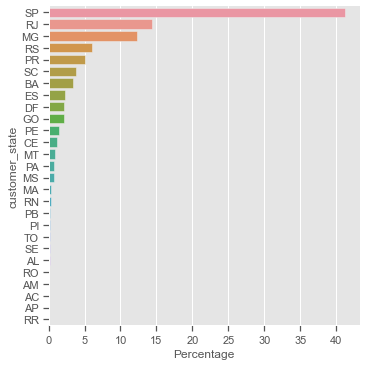

In [18]:
## Where are the purchases coming from?

df_17 = df[df.purchase_year == 2017]
buyer_mix_17 = df_17.groupby('customer_state').price.sum().reset_index()
buyer_mix_17 = buyer_mix_17.sort_values('price', ascending=False)
buyer_mix_17['Percentage'] = round(100*buyer_mix_17['price'] / buyer_mix_17['price'].sum(),1)
print(buyer_mix_17[:10])

plt.figure(figsize=(14,7));
sns.catplot(y='customer_state', x='Percentage', kind='bar', data=buyer_mix_17);

   customer_state       price  Percentage
25             SP  1848239.50        46.4
18             RJ   502611.19        12.6
10             MG   498747.62        12.5
22             RS   208253.57         5.2
17             PR   208078.32         5.2
23             SC   148484.84         3.7
4              BA   115100.53         2.9
6              DF    94616.92         2.4
7              ES    76779.27         1.9
8              GO    74780.62         1.9


<Figure size 1008x504 with 0 Axes>

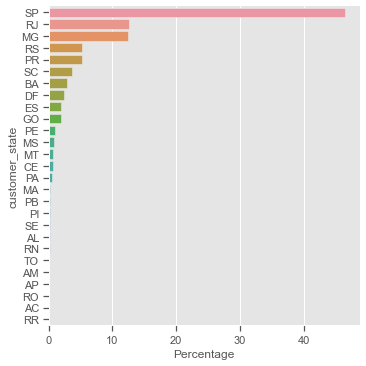

In [19]:
df_18 = df[df.purchase_year == 2018]
buyer_mix_18 = df_18.groupby('customer_state').price.sum().reset_index()
buyer_mix_18 = buyer_mix_18.sort_values('price', ascending=False)
buyer_mix_18['Percentage'] = round(100*buyer_mix_18['price'] / buyer_mix_18['price'].sum(),1)
print(buyer_mix_18[:10])

plt.figure(figsize=(14,7));
sns.catplot(y='customer_state', x='Percentage', kind='bar', data=buyer_mix_18);

   seller_state       price  Percentage
19           SP  2431422.18        71.4
6            MG   286574.93         8.4
12           PR   246031.33         7.2
17           SC   140799.33         4.1
13           RJ   135110.60         4.0
16           RS    69325.81         2.0
3            DF    34066.95         1.0
1            BA    28554.11         0.8
5            GO    15429.30         0.5
4            ES     5902.56         0.2


<Figure size 1008x504 with 0 Axes>

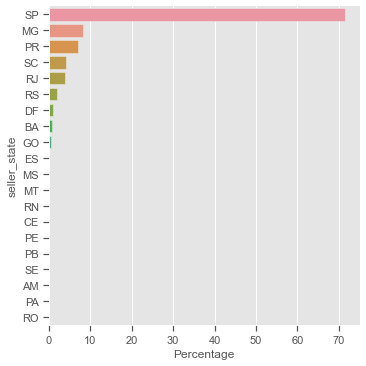

In [20]:
seller_mix_17 = df_17.groupby('seller_state').price.sum().reset_index()
seller_mix_17 = seller_mix_17.sort_values('price', ascending=False)
seller_mix_17['Percentage'] = round(100*seller_mix_17['price'] / seller_mix_17['price'].sum(),1)
print(seller_mix_17[:10])

plt.figure(figsize=(14,7));
sns.catplot(y='seller_state', x='Percentage', kind='bar', data=seller_mix_17);

   seller_state       price  Percentage
18           SP  2828004.67        70.9
13           PR   338526.10         8.5
6            MG   254564.99         6.4
14           RJ   220384.59         5.5
17           SC   113014.67         2.8
16           RS    80162.59         2.0
11           PE    42241.67         1.1
5            MA    27934.73         0.7
2            DF    27374.66         0.7
4            GO    20514.75         0.5


<Figure size 1008x504 with 0 Axes>

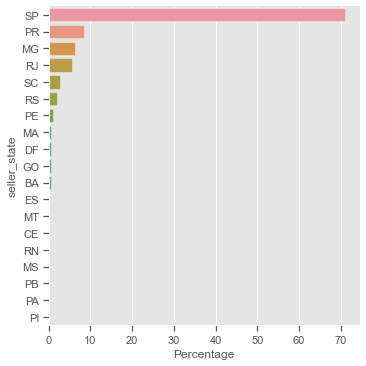

In [21]:
seller_mix_18 = df_18.groupby('seller_state').price.sum().reset_index()
seller_mix_18 = seller_mix_18.sort_values('price', ascending=False)
seller_mix_18['Percentage'] = round(100*seller_mix_18['price'] / seller_mix_18['price'].sum(),1)
print(seller_mix_18[:10])

plt.figure(figsize=(14,7));
sns.catplot(y='seller_state', x='Percentage', kind='bar', data=seller_mix_18);

It's become clear that both buyers and sellers are concentrated in the state of Sao Paulo. 

In [22]:
df['SP'] = np.where(df['customer_state'] == 'SP', 'Yes', 'No')

<Figure size 1008x504 with 0 Axes>

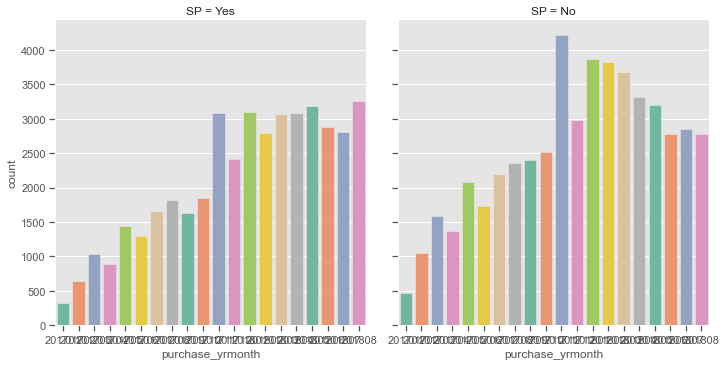

In [23]:
plt.figure(figsize=(14,7));
sns.catplot(x='purchase_yrmonth', col='SP', palette='Set2', kind='count', data=df);

Sales have flattened in the state of Sao Paulo in 2018, and actually declined in states outside of Sao Paulo. 

In [24]:
## Calculate the median number of orders per seller in 2017 and 2018

sellers = df[df['seller_id'].notna()]
sellers['SP'] = np.where(sellers['customer_state'] == 'SP', 'Yes', 'No')
sellers_17 = sellers[sellers['purchase_year'] == 2017]
sellers_18 = sellers[sellers['purchase_year'] == 2018]
sellers_17 = sellers_17.groupby(['seller_id']).order_id.count().reset_index()
sellers_17_med = sellers_17.order_id.median()
sellers_18 = sellers_18.groupby(['seller_id']).order_id.count().reset_index()
sellers_18_med = sellers_18.order_id.median()

print('2017 order/seller: ', sellers_17_med, '2018 order/seller: ', sellers_18_med)

2017 order/seller:  6.0 2018 order/seller:  6.0


In [25]:
df['SP'] = np.where(df['customer_state'] == 'SP', 'Yes', 'No')
buyers_17 = df[df['purchase_year'] == 2017]
buyers_18 = df[df['purchase_year'] == 2018]
buyers_17 = buyers_17.groupby(['customer_id']).order_id.count().reset_index()
buyers_17_med = buyers_17.order_id.median()
buyers_18 = buyers_18.groupby(['customer_id']).order_id.count().reset_index()
buyers_18_med = buyers_18.order_id.median()

print('2017 order/buyer: ', buyers_17_med, '2018 order/buyer: ', buyers_18_med)

2017 order/buyer:  1.0 2018 order/buyer:  1.0


The median number of orders per buyer is only one in both 2017 and 2018.

In [26]:
## Could the number of days it takes for a buyer to receive their product be turning customers away?

df['est_days_to_deliver'] = df['order_estimated_delivery_date'] - df['order_purchase_timestamp']
df['est_days_to_deliver'] = df['est_days_to_deliver'].dt.days
print('Median no. of days to deliver: ', df.est_days_to_deliver.median())

Median no. of days to deliver:  22.0


    purchase_yrmonth  est_days_to_deliver
0             201701                 38.0
1             201702                 29.5
2             201703                 22.0
3             201704                 25.0
4             201705                 23.0
5             201706                 23.0
6             201707                 22.0
7             201708                 22.0
8             201709                 21.0
9             201710                 22.0
10            201711                 21.0
11            201712                 26.0
12            201801                 25.0
13            201802                 23.0
14            201803                 20.0
15            201804                 22.0
16            201805                 20.0
17            201806                 26.0
18            201807                 18.0
19            201808                 12.0


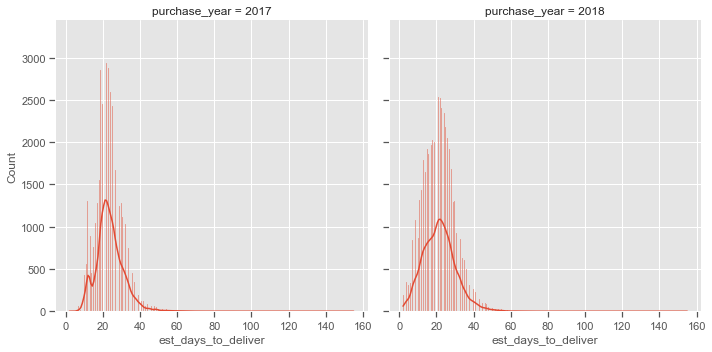

In [27]:
monthly_deliver_days = df.groupby(['purchase_yrmonth']).est_days_to_deliver.median().reset_index()
sns.displot(df, x='est_days_to_deliver', kde=True, col='purchase_year');
print(monthly_deliver_days)

In [28]:
df_17 = df[df.purchase_year == 2017]
product_mix_17 = df_17.groupby('product_category_name').price.sum().reset_index()
product_mix_17 = product_mix_17.sort_values('price', ascending=False)
product_mix_17['Percentage'] = round(100*product_mix_17['price'] / product_mix_17['price'].sum(),1)
print(product_mix_17[:10])

     product_category_name      price  Percentage
13         cama_mesa_banho  430155.17        13.0
32           esporte_lazer  294428.68         8.9
54        moveis_decoracao  234124.20         7.1
11            beleza_saude  230714.29         7.0
44  informatica_acessorios  219851.98         6.6
26              cool_stuff  204558.08         6.2
64      relogios_presentes  196261.65         5.9
12              brinquedos  191085.80         5.8
70   utilidades_domesticas  161226.62         4.9
40      ferramentas_jardim  129062.72         3.9


In [29]:
df_18 = df[df.purchase_year == 2018]
product_mix_18 = df_18.groupby('product_category_name').price.sum().reset_index()
product_mix_18 = product_mix_18.sort_values('price', ascending=False)
product_mix_18['Percentage'] = round(100*product_mix_18['price'] / product_mix_18['price'].sum(),1)
print(product_mix_18[:10])

     product_category_name      price  Percentage
13         cama_mesa_banho  412866.10        10.6
11            beleza_saude  390510.15        10.0
43  informatica_acessorios  347608.48         8.9
31           esporte_lazer  337256.16         8.6
65      relogios_presentes  324602.88         8.3
53        moveis_decoracao  237958.19         6.1
70   utilidades_domesticas  228620.28         5.8
8               automotivo  172764.58         4.4
25              cool_stuff  137092.00         3.5
61              perfumaria  126218.35         3.2


The number of days it takes for a purchaser to receive their product is relatively unchanged in 2018 compared to 2017, when sales were climbing. The mix of product categories in both years appears healthy. The fact that most buyers are only purchasing one item is concerning, and there doesn't appear to be any growth in this metric from one year to the next.